In [1]:
#from HeaderP import *
import pandas as pd

In [2]:
APOGEE=pd.read_pickle('./Data/APOGEE_dr16.pkl')
GALAH=pd.read_pickle('./Data/galah_dr3_gaia_cm.pkl')
Kepler_prot=pd.read_pickle('./Data/Kepler_Periodic.pkl')
Kepler_nonprot=pd.read_pickle('./Data/Kepler_Non_Periodic.pkl')
RAVE=pd.read_csv('./Data/ravedr6.csv')
LAMOST=pd.read_csv('./Data/LAMOST_dr6_v2_LRS.csv',delimiter='|')
TESS=pd.read_pickle('./Data/TESS_target.pkl')



/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
SurveyDic={0:APOGEE,1:GALAH,2:Kepler_prot,3:Kepler_nonprot,4:RAVE,5:LAMOST,6:TESS}
SurveyDic_name={0:'APOGEE',1:'GALAH',2:'Kepler_prot',3:'Kepler_nonprot',4:'RAVE',5:'LAMOST',6:'TESS'}

from itertools import combinations

cms=list(combinations(range(7), 2))
for i in range(3,7):
    newlist=list(combinations(range(7), i))
    for j in newlist:
        cms.append(j)

In [4]:
print(len(Kepler_prot))

38573


In [172]:

# read in data
surveys=[]
datanum=[]
for i in range(len(cms)):
    # how many surveys to cm
    cm_survey=[]
    cm_survey.append(SurveyDic_name[cms[i][0]])
    cm_survey.append(SurveyDic_name[cms[i][1]])
    cmname=SurveyDic_name[cms[i][0]]+'_cm_'+SurveyDic_name[cms[i][1]]
    cmlen=len(cms[i])
    if cmlen>2:
        for j in range(1,cmlen-1):
            cm_survey.append(SurveyDic_name[cms[i][j+1]])
            cmname=cmname+'_cm_'+SurveyDic_name[cms[i][j+1]]
    
    try:
        df1df2=pd.read_pickle('Data/'+cmname+'.pkl')
        print(cm_survey,',',cmlen,',',len(df1df2),cmname)
        surveys.append(cm_survey)
        datanum.append(len(df1df2))
    except:
        continue

['APOGEE', 'GALAH'] , 2 , 14399 APOGEE_cm_GALAH
['APOGEE', 'Kepler_prot'] , 2 , 2108 APOGEE_cm_Kepler_prot
['APOGEE', 'Kepler_nonprot'] , 2 , 2388 APOGEE_cm_Kepler_nonprot
['APOGEE', 'RAVE'] , 2 , 6858 APOGEE_cm_RAVE
['APOGEE', 'LAMOST'] , 2 , 225637 APOGEE_cm_LAMOST
['APOGEE', 'TESS'] , 2 , 33311 APOGEE_cm_TESS
['GALAH', 'RAVE'] , 2 , 35844 GALAH_cm_RAVE
['GALAH', 'LAMOST'] , 2 , 84370 GALAH_cm_LAMOST
['GALAH', 'TESS'] , 2 , 46265 GALAH_cm_TESS
['Kepler_prot', 'LAMOST'] , 2 , 21897 Kepler_prot_cm_LAMOST
['Kepler_prot', 'TESS'] , 2 , 459 Kepler_prot_cm_TESS
['Kepler_nonprot', 'LAMOST'] , 2 , 51323 Kepler_nonprot_cm_LAMOST
['Kepler_nonprot', 'TESS'] , 2 , 234 Kepler_nonprot_cm_TESS
['RAVE', 'LAMOST'] , 2 , 15819 RAVE_cm_LAMOST
['RAVE', 'TESS'] , 2 , 101767 RAVE_cm_TESS
['LAMOST', 'TESS'] , 2 , 34766 LAMOST_cm_TESS
['APOGEE', 'GALAH', 'RAVE'] , 3 , 1176 APOGEE_cm_GALAH_cm_RAVE
['APOGEE', 'GALAH', 'LAMOST'] , 3 , 5998 APOGEE_cm_GALAH_cm_LAMOST
['APOGEE', 'GALAH', 'TESS'] , 3 , 5953 APOGEE

In [22]:
from upsetplot import generate_counts
from upsetplot import from_memberships

In [23]:
example = from_memberships(
    surveys,
    data=datanum)

In [24]:
from upsetplot import plot

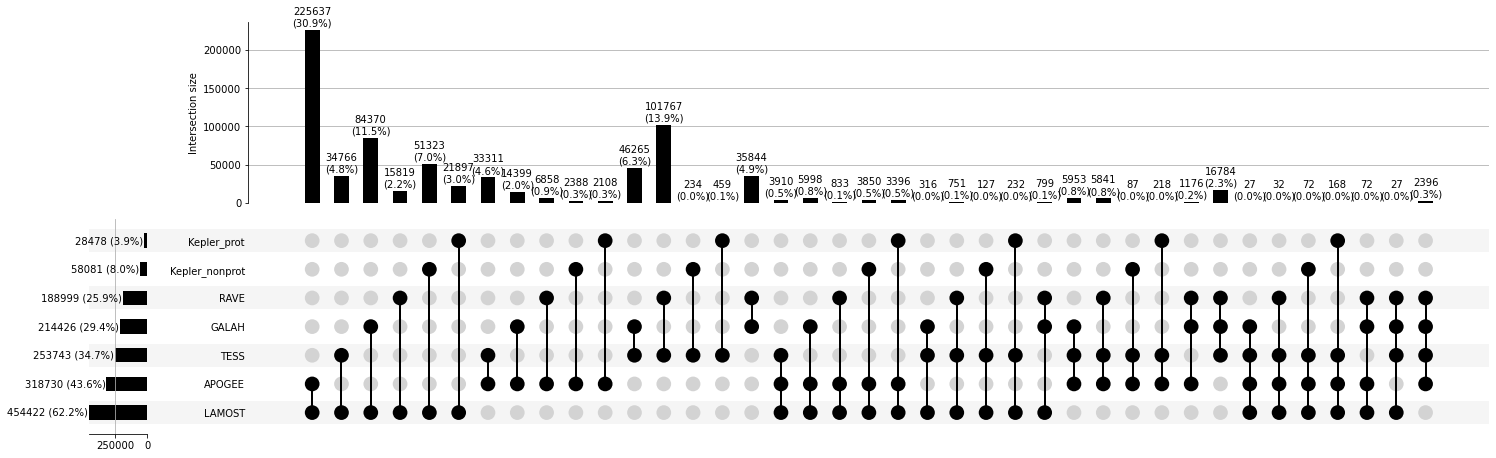

<Figure size 432x288 with 0 Axes>

In [112]:
import matplotlib.pyplot as plt
from upsetplot import UpSet
fig, ax=plt.figsize=(20,10)
upset = UpSet(example, show_counts='%d',element_size=42,show_percentages=True)
upset.plot()
plt.show()
plt.savefig('Table_sum.png')

## Add in other features


In [166]:
from HeaderP import *

def m_to_M(m, D):
    """
    Convert apparent magnitude to absolute magnitude.
    """
    return m - 5*np.log10(D)-10
    

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


['APOGEE', 'GALAH'] , 2 , 14399
['APOGEE', 'Kepler_prot'] , 2 , 2108
['APOGEE', 'Kepler_nonprot'] , 2 , 2388
['APOGEE', 'RAVE'] , 2 , 6858


/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


['APOGEE', 'LAMOST'] , 2 , 225637
['APOGEE', 'TESS'] , 2 , 33311
['GALAH', 'RAVE'] , 2 , 35844
['Kepler_prot', 'LAMOST'] , 2 , 21897
['Kepler_prot', 'TESS'] , 2 , 459
['Kepler_nonprot', 'LAMOST'] , 2 , 51323
['Kepler_nonprot', 'TESS'] , 2 , 234
['RAVE', 'LAMOST'] , 2 , 15819
['RAVE', 'TESS'] , 2 , 101767
['APOGEE', 'GALAH', 'RAVE'] , 3 , 1176
['APOGEE', 'GALAH', 'LAMOST'] , 3 , 5998
['APOGEE', 'GALAH', 'TESS'] , 3 , 5953
['APOGEE', 'Kepler_prot', 'LAMOST'] , 3 , 3396
['APOGEE', 'Kepler_prot', 'TESS'] , 3 , 218
['APOGEE', 'Kepler_nonprot', 'LAMOST'] , 3 , 3850
['APOGEE', 'Kepler_nonprot', 'TESS'] , 3 , 87
['APOGEE', 'RAVE', 'LAMOST'] , 3 , 833
['APOGEE', 'RAVE', 'TESS'] , 3 , 5841
['APOGEE', 'LAMOST', 'TESS'] , 3 , 3910
['GALAH', 'RAVE', 'LAMOST'] , 3 , 799
['GALAH', 'RAVE', 'TESS'] , 3 , 16784
['Kepler_prot', 'LAMOST', 'TESS'] , 3 , 232
['Kepler_nonprot', 'LAMOST', 'TESS'] , 3 , 127
['RAVE', 'LAMOST', 'TESS'] , 3 , 751
['APOGEE', 'GALAH', 'RAVE', 'LAMOST'] , 4 , 72
['APOGEE', 'GALAH', 

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: Runtim

(30.0, -5.0)

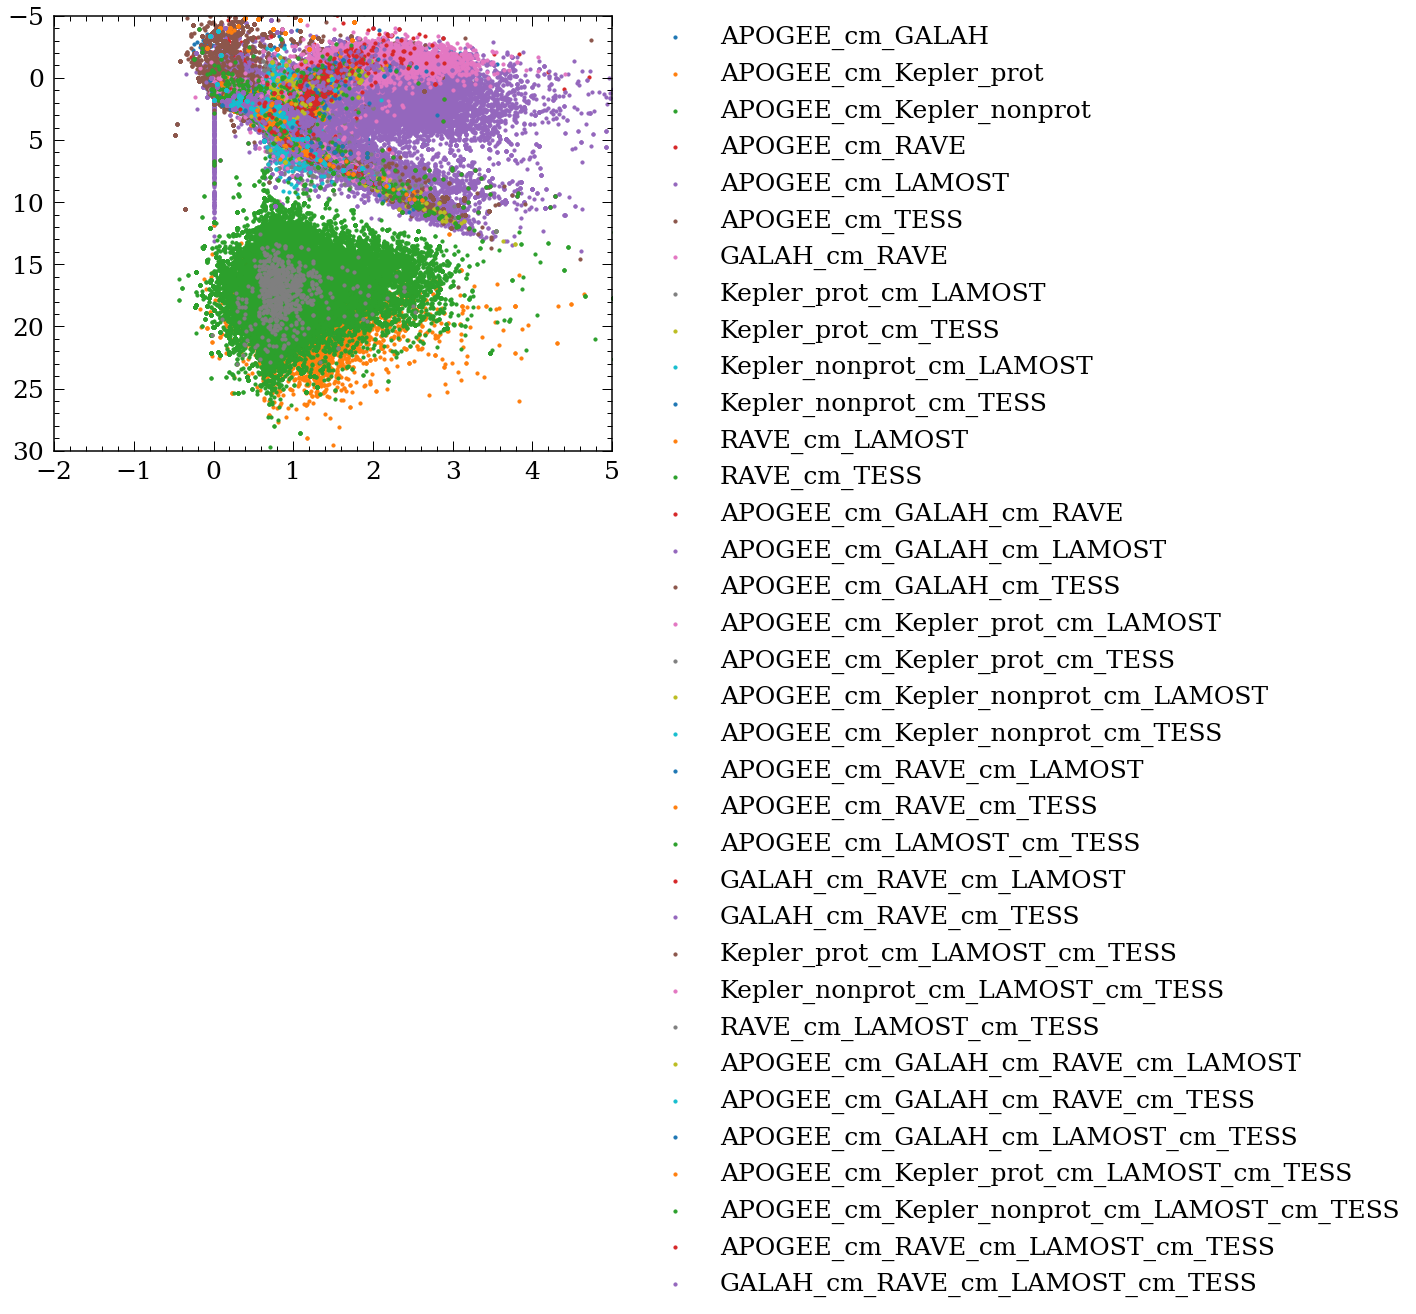

In [171]:
from scipy.stats import norm
plt.figure(figsize=(10,8))
# read in data
surveys=[]
datanum=[]
for i in range(len(cms)):
    # how many surveys to cm
    cm_survey=[]
    cm_survey.append(SurveyDic_name[cms[i][0]])
    cm_survey.append(SurveyDic_name[cms[i][1]])
    cmname=SurveyDic_name[cms[i][0]]+'_cm_'+SurveyDic_name[cms[i][1]]
    cmlen=len(cms[i])
    if cmlen>2:
        for j in range(1,cmlen-1):
            cm_survey.append(SurveyDic_name[cms[i][j+1]])
            cmname=cmname+'_cm_'+SurveyDic_name[cms[i][j+1]]
    
    try:
        df1df2=pd.read_pickle('Data/'+cmname+'.pkl')
        if 'APOGEE' in cm_survey:
            df1df2['color']=df1df2['GAIA_PHOT_BP_MEAN_MAG']-df1df2['GAIA_PHOT_RP_MEAN_MAG']
            df1df2['abs_G']=m_to_M(df1df2['GAIA_PHOT_G_MEAN_MAG'], df1df2['GAIA_R_EST']/1000)
        elif ('GALAH' in cm_survey) or ('Kepler_prot' in cm_survey) or ('Kepler_nonprot' in cm_survey):
            df1df2['color']=df1df2['phot_bp_mean_mag']-df1df2['phot_rp_mean_mag']
            df1df2['abs_G']=m_to_M(df1df2['phot_g_mean_mag'], df1df2['r_est']/1000)
        elif 'RAVE' in cm_survey:
            df1df2['color']=df1df2['phot_bp_mean_mag']-df1df2['phot_rp_mean_mag']
            df1df2['abs_G']=m_to_M(df1df2['phot_g_mean_mag'], df1df2['dist']/1000)
        
        plt.scatter(df1df2['color'],df1df2['abs_G'],s=10,alpha=1,label=cmname)
        print(cm_survey,',',cmlen,',',len(df1df2))
        surveys.append(cm_survey)
        datanum.append(len(df1df2))
    except:
        continue

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim([-2,5])
plt.ylim([30,-5])

In [173]:
APOGEE_cm_GALAH_cm_RAVE_cm_TESS

NameError: name 'APOGEE_cm_GALAH_cm_RAVE_cm_TESS' is not defined